Перед нами датасет с информацией о видеоиграх. Информация взята с ресурса kaggle вот ссылка:https://www.kaggle.com/kanncaa1/visualization-bokeh-tutorial-part-1 В рамках данного кейса мы попробуем провести EDA и визуализировать данные.

In [58]:
import numpy as np
import pandas as pd

In [59]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Rank-рейтинг общих продаж, целое число

Название-название игр

Платформа-платформа выпуска игр (например, PC, PS4 и т. д.), объект

Year-год выпуска игры

Жанр-жанр игры, объект

Publisher-издатель игры, объект

NA_Sales-продажи в Северной Америке (в миллионах)

EU_Sales-продажи в Европе (в миллионах)

JP_Sales-продажи в Японии (в миллионах)

Other_Sales-продажи в остальном мире (в миллионах)

Global_Sales-общий объем продаж по всему миру

In [60]:
df.shape

(16598, 11)

In [61]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [62]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [63]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Как мы видим датасет не полный, не по всем играм есть информация относительно года выхода, но пока оставим как есть.

In [64]:
df.groupby('Platform',as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending = False)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS2,583.84,339.29,139.20,193.44,1255.64
28,X360,601.05,280.58,12.43,85.54,979.96
17,PS3,392.26,343.71,79.99,141.93,957.84
26,Wii,507.71,268.38,69.35,80.61,926.71
4,DS,390.71,194.65,175.57,60.53,822.49
15,PS,336.51,213.60,139.82,40.91,730.66
6,GBA,187.54,75.25,47.33,7.73,318.50
19,PSP,108.99,68.25,76.79,42.19,296.28
18,PS4,96.80,123.70,14.30,43.36,278.10
13,PC,93.28,139.68,0.17,24.86,258.82


Определим топ-7 из распределения продаж по платформам и изучим более детально, визуализируем данные.

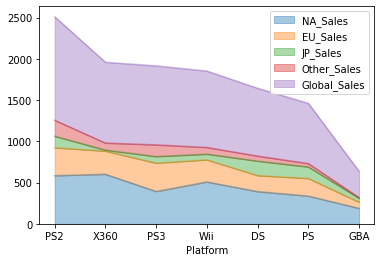

In [65]:
df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending = False).head(7).plot.area(alpha = 0.4)

Существенная доля рынка пренадлежит Северной Америке и Европе, снижение прежде всего данных долей уменьшает глобальные продажи

In [66]:
df['percentage_NA_Sales']=df['NA_Sales']/df['Global_Sales']
df['percentage_EU_Sales']=df['EU_Sales']/df['Global_Sales']
df['percentage_JP_Sales']=df['JP_Sales']/df['Global_Sales']
df['percentage_Other_Sales']=df['Other_Sales']/df['Global_Sales']
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,percentage_NA_Sales,percentage_EU_Sales,percentage_JP_Sales,percentage_Other_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564,0.102248
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235,0.019135
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807,0.092406
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.333636,0.099394,0.089697
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789,0.031878


In [67]:
df1=df.groupby('Platform').agg({'percentage_NA_Sales':'mean', 'percentage_EU_Sales':'mean', 'percentage_JP_Sales':'mean', 'percentage_Other_Sales':'mean'})
df2=df.groupby('Platform',as_index=False)[['Global_Sales']].sum()
df3=pd.merge(df1, df2, how ='inner', on ='Platform')
df3.sort_values('Global_Sales', ascending = False)

,Platform,percentage_NA_Sales,percentage_EU_Sales,percentage_JP_Sales,percentage_Other_Sales,Global_Sales
16,PS2,0.377514,0.247725,0.263698,0.111958,1255.64
28,X360,0.591159,0.264909,0.063323,0.076724,979.96
17,PS3,0.370232,0.279846,0.235415,0.114785,957.84
26,Wii,0.639326,0.191557,0.093521,0.065096,926.71
4,DS,0.542042,0.119491,0.278669,0.045724,822.49
15,PS,0.429728,0.282809,0.227669,0.055798,730.66
6,GBA,0.637683,0.227288,0.110705,0.009527,318.50
19,PSP,0.312556,0.085557,0.536616,0.061610,296.28
18,PS4,0.285176,0.375604,0.211873,0.122513,278.10
13,PC,0.178283,0.684419,0.000058,0.102252,258.82


Мы можем увидеть, что в процентном соотношении основные продажи X360 приходятся на Северную Америку и очень низкий объем продаж в Японии, в то время как PS2, PS3 распределены более равномерно

In [68]:
df.groupby('Year', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending = False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
28,2008.0,351.44,184.40,60.26,82.39,678.90
29,2009.0,338.85,191.59,61.89,74.77,667.30
27,2007.0,312.05,160.50,60.29,77.60,611.13
30,2010.0,304.24,176.73,59.49,59.90,600.45
26,2006.0,263.12,129.24,73.73,54.43,521.04
31,2011.0,241.06,167.44,53.04,54.39,515.99
25,2005.0,242.61,121.94,54.28,40.58,459.94
24,2004.0,222.59,107.32,41.65,47.29,419.31
22,2002.0,216.19,109.74,41.76,27.28,395.52
33,2013.0,154.77,125.80,47.59,39.82,368.11


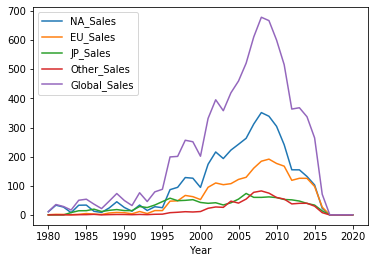

In [69]:
df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().plot()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

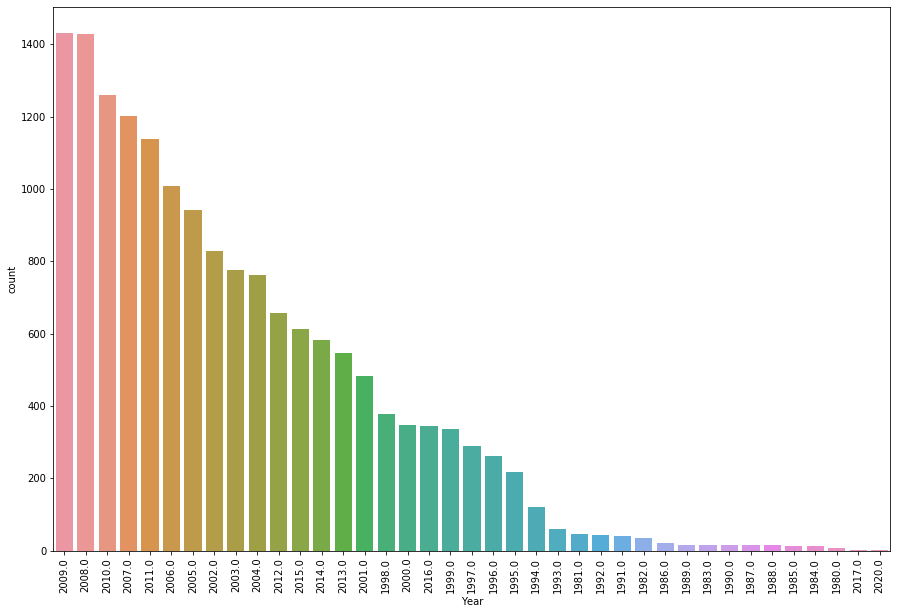

In [70]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

Как можно видеть рынок видеоигр стремительно рос до 2009-2010 годо, после чего наметился спад

In [71]:
df.groupby('Genre', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending = False)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,877.83,525.00,159.95,187.38,1751.18
10,Sports,683.35,376.85,135.37,134.97,1330.93
8,Shooter,582.60,313.27,38.28,102.69,1037.37
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
4,Platform,447.05,201.63,130.77,51.59,831.37
3,Misc,410.24,215.98,107.76,75.32,809.96
6,Racing,359.42,238.39,56.69,77.27,732.04
2,Fighting,223.59,101.32,87.35,36.68,448.91
9,Simulation,183.31,113.38,63.70,31.52,392.20
5,Puzzle,123.78,50.78,57.31,12.55,244.95


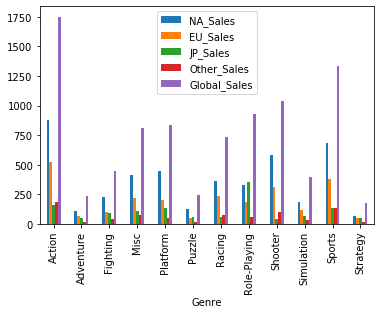

In [72]:
df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().plot.bar()

График получился не очень информативным попробуем изобразить иначе

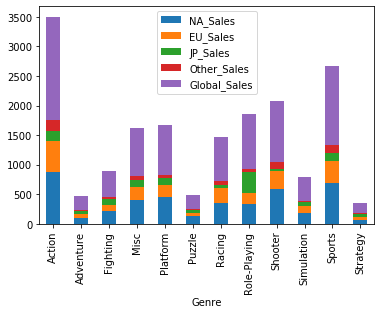

In [73]:
df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().plot.bar(stacked = True)

Наиболее популярные игры в мире это Экш и спорт, При этом стоит отметить, что на японском рынке видеоигр, сравнительно большой популярностью большуются ролевые игры. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

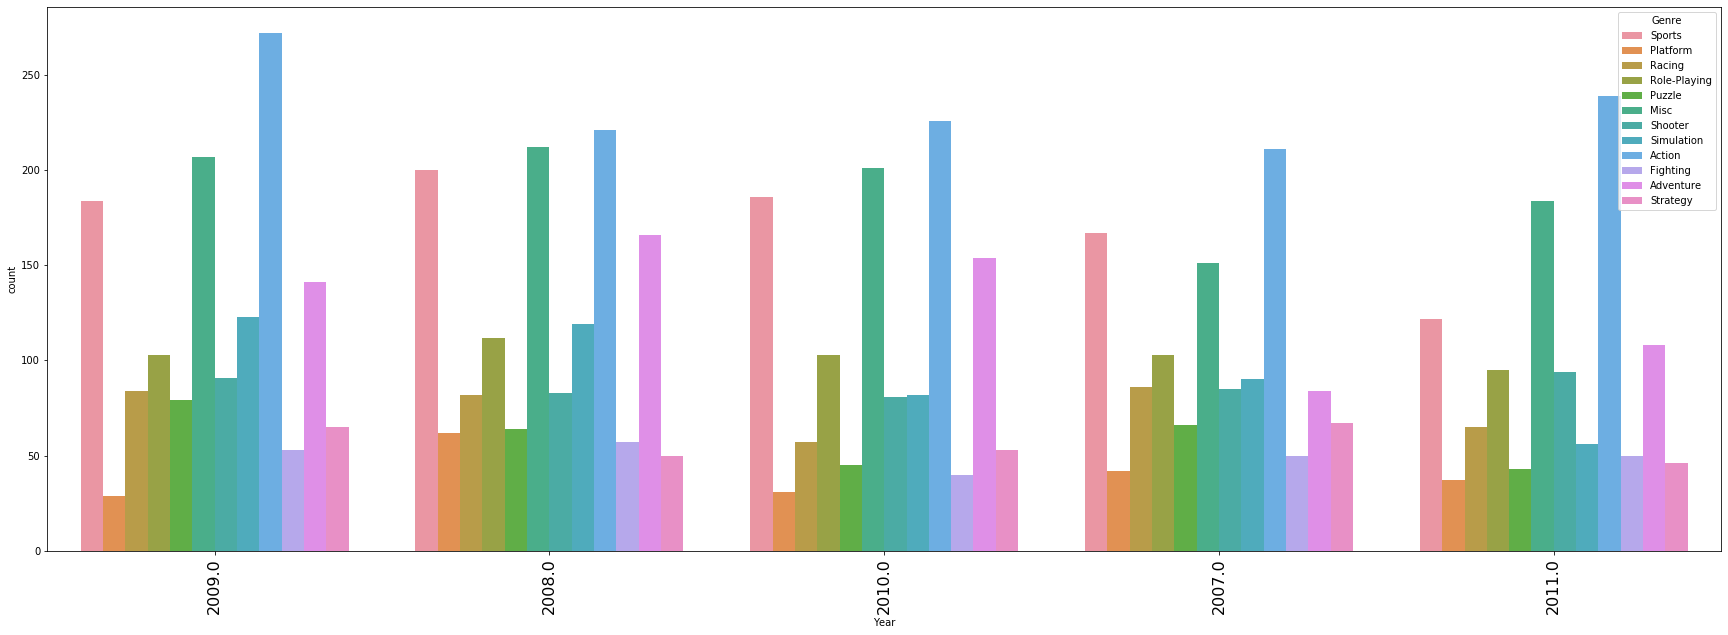

In [74]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

In [75]:
df.groupby('Publisher', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().sort_values('Global_Sales', ascending = False)

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,816.87,418.74,455.42,95.33,1786.56
138,Electronic Arts,595.07,371.27,14.04,129.77,1110.32
21,Activision,429.70,215.53,6.54,75.34,727.46
456,Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
525,Ubisoft,253.43,163.32,7.50,50.26,474.72
...,...,...,...,...,...,...
375,Ongakukan,0.00,0.00,0.01,0.00,0.01
96,Commseed,0.00,0.00,0.01,0.00,0.01
495,Takuyo,0.00,0.00,0.01,0.00,0.01
76,Boost On,0.00,0.00,0.01,0.00,0.01


In [76]:
df.groupby(['Year','Platform']).agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'}).sort_values('Global_Sales', ascending = False).head(10)

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,Platform,,,,,
2004.0,PS2,96.78,56.01,19.17,39.85,211.78
2009.0,Wii,116.54,59.36,16.57,17.79,210.44
2002.0,PS2,96.54,65.27,21.85,21.72,205.40
2003.0,PS2,83.54,61.20,18.88,20.69,184.29
2008.0,Wii,98.77,47.36,12.69,15.25,174.16
2010.0,X360,107.21,47.42,2.11,14.21,171.05
1998.0,PS,83.22,48.74,28.48,9.05,169.58
2001.0,PS2,79.49,52.37,17.79,16.78,166.43
2005.0,PS2,85.60,40.86,15.05,19.15,160.65


Рейтинг топ-10 по продажам в мире с выделением лидера рынка на отчетный год и распределением по географии

In [77]:
df.groupby(['Year','Genre']).agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'}).sort_values('Global_Sales', ascending = False).head(10)

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year   Genre                                                           
2009.0 Action      71.61     39.20     11.96        16.67        139.36
       Sports      71.47     42.17      9.81        15.14        138.52
2008.0 Action      72.39     39.49      6.00        18.55        136.39
2006.0 Sports      72.91     40.20      8.69        14.32        136.16
2013.0 Action      53.79     45.21     10.88        15.33        125.22
2012.0 Action      52.51     42.78     12.30        14.36        122.04
2011.0 Action      53.73     41.04     10.82        13.41        118.96
2010.0 Action      60.32     35.75      8.58        12.85        117.64
2007.0 Action      58.90     25.86      6.13        15.40        106.50
2011.0 Shooter     49.82     35.31      2.69        11.53         99.36

Аналогичная информация по распределению по жанру, второй индекс не удалось определить, т.к. данного набора не было указано в исходном датасете

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

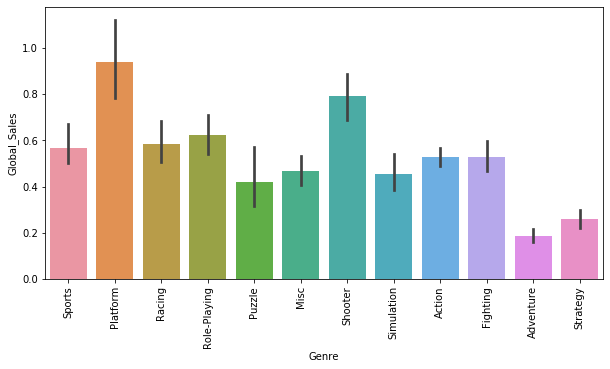

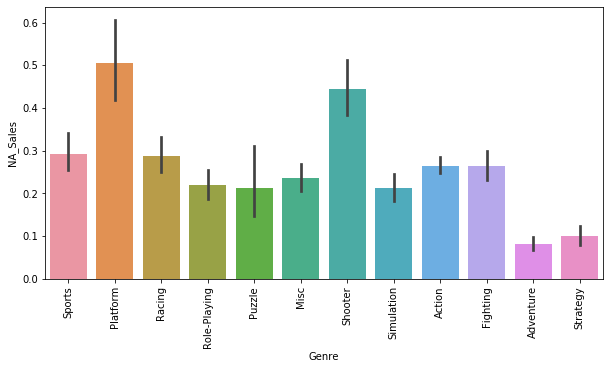

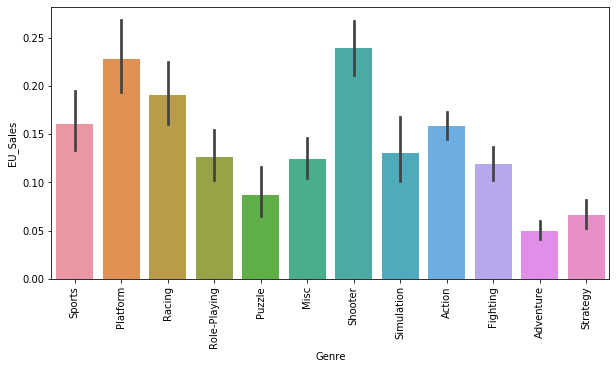

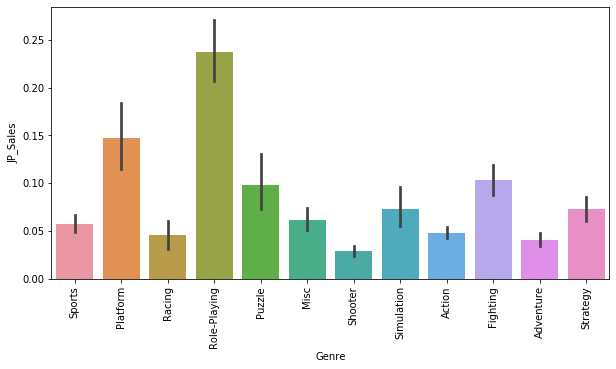

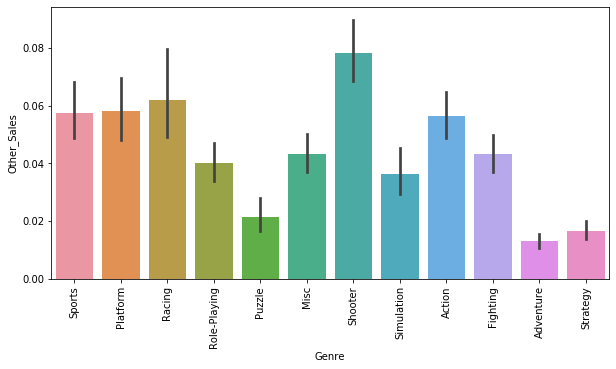

In [78]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Genre", y="Global_Sales", data=df)
plt.xticks(rotation=90)

plt.figure(figsize=(10, 5))
sns.barplot(x="Genre", y="NA_Sales", data=df)
plt.xticks(rotation=90)

plt.figure(figsize=(10, 5))
sns.barplot(x="Genre", y="EU_Sales", data=df)
plt.xticks(rotation=90)

plt.figure(figsize=(10, 5))
sns.barplot(x="Genre", y="JP_Sales", data=df)
plt.xticks(rotation=90)

plt.figure(figsize=(10, 5))
sns.barplot(x="Genre", y="Other_Sales", data=df)
plt.xticks(rotation=90)
